540:540 COMP MTHDS HW 1 

#### Monte Carlo Integration Approach

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import *

In [2]:
plt.style.use('seaborn')

E(h(x)) is 0.9469139293986579 with the MC integration when N=1000


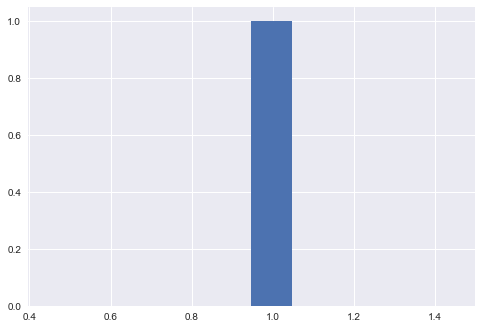

In [3]:
N = 1000
x  = 10 * np.random.random(size=N)  # U(0, 10) 
ans1_1 = 1/N * sum(10 * laplace.pdf(x,5,0.5))
count, bins, ignored = plt.hist(ans1_1, 10)
print("E(h(x)) is",ans1_1,"with the MC integration when N=1000")

## Importance Sampling Approach

E(h(x)) is  1.0056869381138385 with the Importance Sampling Integration in N=1000


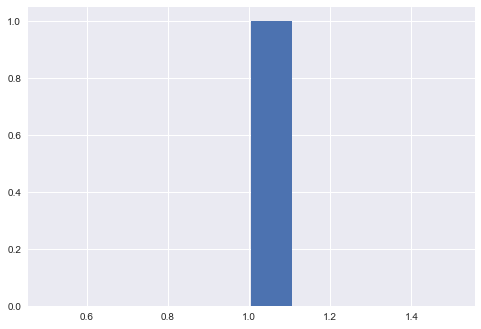

In [4]:
N = 1000
y = np.random.normal(5, 1, N)  #N(5,1)
ans1_2 = 1 / N * sum(
    laplace.pdf(y, 5, 0.5) /
    ((1 / np.sqrt(2 * np.pi)) * np.exp(-(y - 5)**2 / 2)))
count, bins, ignored = plt.hist(ans1_2, 10)
print("E(h(x)) is ", ans1_2,
      "with the Importance Sampling Integration in N=1000")

## Compare Monte Carlo Integration & Importance Sampling for different sample sizes

In [5]:
Ns = np.linspace(100, 200000, 20)
ans1s = []
ans2s = []

for i in range(len(Ns)):
    N = int(Ns[i])

    x = 10 * np.random.random(size=N)
    ans1 = 1 / N * sum(10 * laplace.pdf(x, 5, 0.5))
    ans1s.append(ans1)

    y = np.random.normal(5, 1, N)
    ans2 = 1 / N * sum(
        laplace.pdf(y, 5, 0.5) /
        ((1 / np.sqrt(2 * np.pi)) * np.exp(-(y - 5)**2 / 2)))
    ans2s.append(ans2)
print(f"When N = {Ns},\n E(h(x)) = {ans1s} with MC intgration method\n E(h(x)) = {ans2s} with IS Method.")

When N = [1.00000000e+02 1.06210526e+04 2.11421053e+04 3.16631579e+04
 4.21842105e+04 5.27052632e+04 6.32263158e+04 7.37473684e+04
 8.42684211e+04 9.47894737e+04 1.05310526e+05 1.15831579e+05
 1.26352632e+05 1.36873684e+05 1.47394737e+05 1.57915789e+05
 1.68436842e+05 1.78957895e+05 1.89478947e+05 2.00000000e+05],
 E(h(x)) = [0.8094435904826685, 0.9789469515890035, 0.9918528507951437, 1.0070349105820318, 1.001728453730802, 1.007967698012293, 1.007662800801841, 1.003299107047562, 1.0022293519586554, 1.0055662870173179, 0.9962107892281463, 1.0039800805909664, 0.9924753582987957, 1.0049077898518979, 0.9849709611120048, 0.9973521538293751, 0.9951204673779451, 0.9998848177553306, 0.998777463845171, 1.0004410475756478] with MC intgration method
 E(h(x)) = [0.9626585255268885, 1.0020042975337802, 0.995585162007999, 0.9986560666705815, 1.000586016081419, 0.9996664426459659, 1.003949385919912, 1.0000976511243713, 1.0013933541258824, 1.0001841985072908, 0.999014171152674, 0.9995052630632572, 0.9

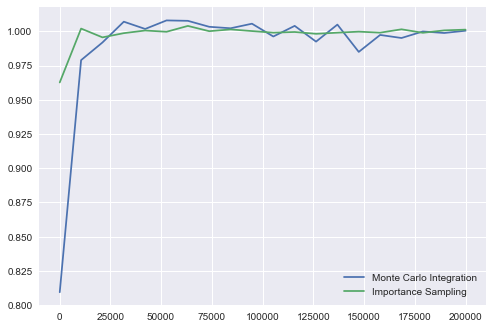

In [6]:
_, ax = plt.subplots()
ax.plot(Ns, ans1s, label='Monte Carlo Integration')
ax.plot(Ns, ans2s, label='Importance Sampling')
ax.legend()

## Importance Sampling evaluate  m-th  moment when m = 2,3,4,5

In [27]:
N = 1000
z = np.random.normal(0, 2, N)  #N(0,2)

Ms = [2, 3, 4, 5]
ms = []

for i in range(len(Ms)):
    M = int(Ms[i])
    m = 1 / N * (sum(z**M * laplace.pdf(z, 0, 1) / (norm.pdf(z, 0, 4))))
    ms.append(m)
    
    print(f'M = {M}, {M}-th moment = {m}')

M = 2, 2-th moment = 1.9229722508335891
M = 3, 3-th moment = 0.1318803681411645
M = 4, 4-th moment = 9.712531203973683
M = 5, 5-th moment = 0.9507791856685723


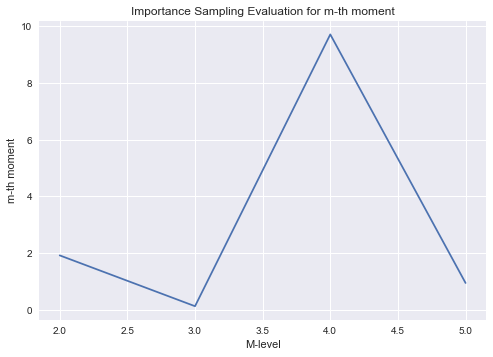

In [28]:
_, ax = plt.subplots()
ax.set_xlabel('M-level')
ax.set_ylabel('m-th moment')
ax.set_title('Importance Sampling Evaluation for m-th moment')
ax.plot(Ms, ms)

## Report the sample mean and variance of h(X) when the sample size = 100,1000,10000 each.

In [29]:
Ns = [100,1000,10000]

means = []
variances = []

for i in range(len(Ns)):
    N = int(Ns[i])
    z = np.random.normal(0,2, N)
    m2 = 1/N *(sum(z**2*laplace.pdf(z, 0, 1)/(norm.pdf(z, 0, 4))))
    mean = 1/N *(sum(z*laplace.pdf(z, 0, 1)/(norm.pdf(z, 0, 4))))
    means.append(mean)
    
    variance = m2- mean**2
    variances.append(variance)
print(f'When N={Ns},\n h(x)\'s mean = {means}, variance is {variances}')

When N=[100, 1000, 10000],
 h(x)'s mean = [0.022647831668226016, 0.05700349429464668, -0.013129026694515471], variance is [2.0237542124755104, 2.0067936524275174, 1.9820605898341257]


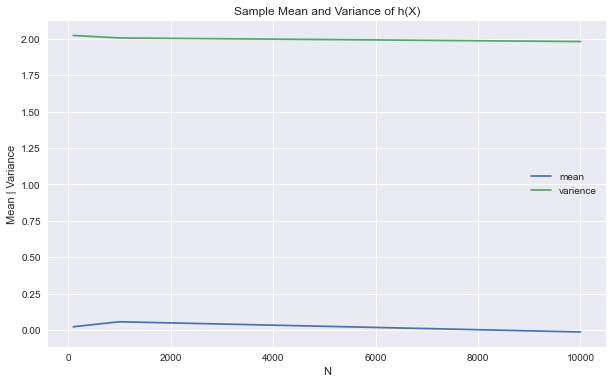

In [30]:
_, ax = plt.subplots(figsize=(10,6))
ax.set_xlabel('N')
ax.set_ylabel('Mean | Variance')
ax.set_title('Sample Mean and Variance of h(X)')
ax.plot(Ns, means, label='mean')
ax.plot(Ns, variances, label='varience')
ax.legend()